### Plot sample data for visualisation

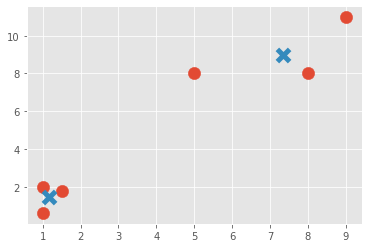

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[1, 2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
             [9, 11]])

plt.scatter(X[:,0], X[:,1], s=150)
# plt.show()

clf= KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

# list of colors to use for plotting
colors = ["g", "r", "c", "b", "k"]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=25)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidth=5)
plt.show()

# print(X[:10])

### Define K Means class

In [13]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):  # tol is how much centroid moves each time
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        
        self.centroids = {}
        
        for i in range(self.k):
            np.random.shuffle(data)
            self.centroids[i] = data[i]  # first two centroids "randomly" chosen from data
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []  # self.class is a dictionary with 0 to k keys. Each key has a list as value
            
            for featureset in data:
                # for every centroid (k number of them) compare the distance of each feature to it
                # get a list of these distances, ordered by centroid
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                # get the index of the centroid that is shortest distance; this is the feature's assigned centroid
                classification = distances.index(min(distances))
                # append that index to the dictionary for the kth key/centroid
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            # for 0 to k in the new classification for every featureset
            # take average of all the featuresets assigned for that classification
            # that average is the coordinates/features of the new centroid, reassign to self.centroids
            for classsification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                # if the difference is more than tolerance, not optimized yet
                # i.e. the difference between moves is still large
                if abs(np.sum((current_centroid - original_centroid) / original_centroid * 100.0)) > self.tol:
                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))
                    optimized = False
            
            if optimized:
                break
    
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        # get the index of the centroid that is shortest distance; this is the feature's assigned centroid
        classification = distances.index(min(distances))
        return classification

### Train, fit, predict

-36.700336700336706


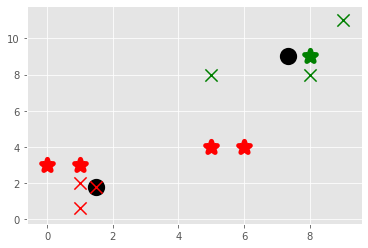

In [14]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=150, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidths=5)

# plt.show()

# predict on new datapoint
unknowns = np.array([[1, 3],
                     [8, 9],
                     [0, 3],
                     [5, 4],
                     [6, 4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)
    
plt.show()